In [22]:
import csv
import math
import string
import datetime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from scipy.stats import linregress
from pandas_datareader import data as web

In [23]:
#Carregando a base de dados
df = pd.read_csv('IBOV.csv')
df["Date"] = pd.to_datetime(df["Date"], format='%Y%m%d') 

In [24]:
data_in_sample = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2020-01-01')]
data_out_of_sample = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2021-01-01')]
col = data_in_sample.columns
col = col[1:len(col)]
retorno_in_sample = pd.DataFrame()
retorno_out_of_sample = pd.DataFrame()
for i in col:
    retorno_in_sample[i] = data_in_sample[i].pct_change().dropna().values
    retorno_out_of_sample[i] = data_out_of_sample[i].pct_change().dropna().values

In [25]:
data_2019 = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2020-01-01')]
col = data_2019.columns
col = col[2:len(col)]
retorno_2019 = pd.DataFrame()
for i in col:
    retorno_2019[i] = data_2019[i].pct_change().dropna().values

In [26]:
muvec   = retorno_2019.mean().values
sigvec  = retorno_2019.std().values
sig2vec = retorno_2019.var().values

In [27]:
a = -0.0001
b = 0.0001
wvec = np.arange(-0.0001, 0.0001, (b - a)/len(col))

In [28]:
mupw = np.dot(wvec, muvec)

In [29]:
sigmat = retorno_2019.cov()

sig2pw = np.dot(np.dot(wvec.T,sigmat),wvec)

In [30]:
a = []
t = 2*sigmat.values
r, c = np.shape(t)
a = np.array([1]*c)
t = np.column_stack((t,a))
a = np.append(a,0)
Amat = np.vstack((t,a))
bvec = [0]*c
bvec.append(1)
bvec = np.array(bvec)
zmat = np.dot(np.linalg.inv(Amat),bvec)

wvec2 = zmat[0:-1]
mugmim = np.dot(wvec2, muvec)

print('Valor Esperado in_sample ' + str(mugmim))

sig2gmim = np.dot(np.dot(wvec2.T,sigmat),wvec2)

print('Variância in_sample ' + str(sig2gmim))

siggmim = np.sqrt(sig2gmim)

print('Desvio Padrão in_sample ' + str(siggmim))

Valor Esperado in_sample 0.001125800769183724
Variância in_sample 3.67331732243898e-05
Desvio Padrão in_sample 0.006060789818529413


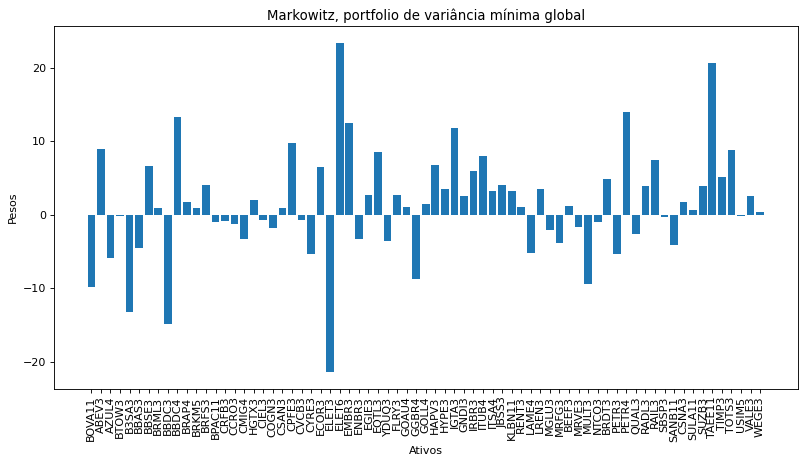

In [31]:
fig = plt.figure(figsize=(12, 6), dpi=80)
plt.bar(col, (wvec2)*100)
plt.xlabel('Ativos') 
plt.ylabel('Pesos') 
  
# displaying the title
plt.title("Markowitz, portfolio de variância mínima global")
  
plt.xticks(rotation=90)
plt.show()